IMPORTING LIBRARIES

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
import xgboost as xgb
%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv("Breast_cancer_data.csv")

In [69]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
df.shape

(569, 6)

In [5]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


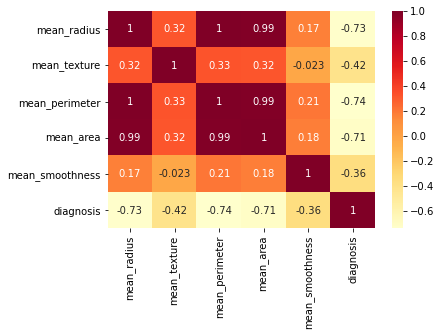

In [7]:
sns.heatmap(df.corr(),annot=True,cmap="YlOrRd")
plt.show()

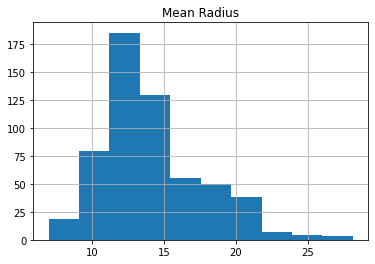

In [8]:
df['mean_radius'].hist()
plt.title('Mean Radius')
plt.show()

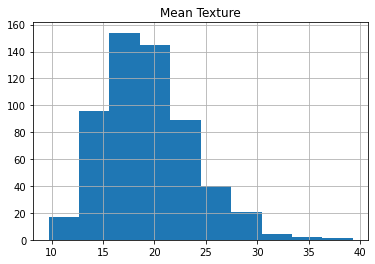

In [9]:
df['mean_texture'].hist()
plt.title('Mean Texture')
plt.show()

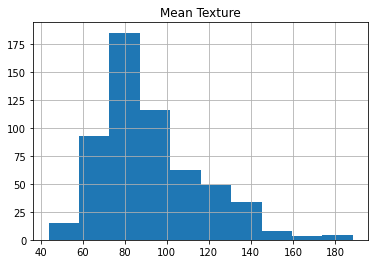

In [10]:
df['mean_perimeter'].hist()
plt.title('Mean Texture')
plt.show()

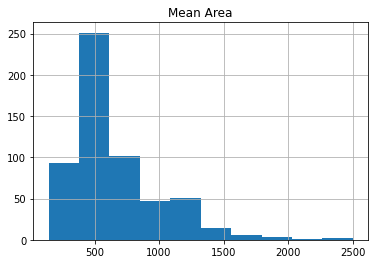

In [11]:
df['mean_area'].hist()
plt.title('Mean Area')
plt.show()

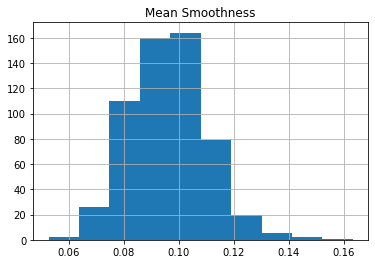

In [12]:
df['mean_smoothness'].hist()
plt.title('Mean Smoothness')
plt.show()

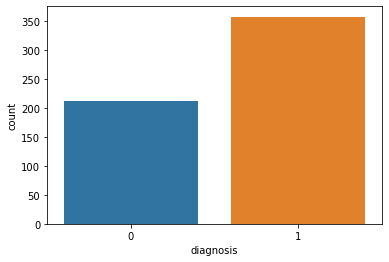

In [13]:
sns.countplot(df['diagnosis'])
plt.show()

**Creating Training and Testing sets**

In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [70]:
df[df.diagnosis==1]

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
19,13.540,14.36,87.46,566.3,0.09779,1
20,13.080,15.71,85.63,520.0,0.10750,1
21,9.504,12.44,60.34,273.9,0.10240,1
37,13.030,18.42,82.61,523.8,0.08983,1
46,8.196,16.84,51.71,201.9,0.08600,1
...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,1
559,11.510,23.93,74.52,403.5,0.09261,1
560,14.050,27.15,91.38,600.4,0.09929,1
561,11.200,29.37,70.67,386.0,0.07449,1


In [7]:
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.transform(x_test)

### **Model Training**

**SVC**

In [19]:
svc_clf = SVC(random_state=0)

In [20]:
C = [1.0,2.0,3.0,5.0,7.0,9.0]
kernel=['rbf','linear','poly']



In [21]:
parameters_svc = {
    'C':C,
    'kernel':kernel
}

In [22]:
clf1 = RandomizedSearchCV(estimator=svc_clf,param_distributions=parameters_svc,cv=5,n_iter=10,scoring='accuracy',random_state=0,n_jobs=-1)

In [23]:
clf1.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(random_state=0), n_jobs=-1,
                   param_distributions={'C': [1.0, 2.0, 3.0, 5.0, 7.0, 9.0],
                                        'kernel': ['rbf', 'linear', 'poly']},
                   random_state=0, scoring='accuracy')

In [24]:
clf1.best_estimator_

SVC(kernel='linear', random_state=0)

In [25]:
svc_clf = SVC(kernel='linear', random_state=0)

In [26]:
svc_clf.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [27]:
y_pred1 = svc_clf.predict(x_test)

In [28]:
print("Accuracy: ",accuracy_score(y_test,y_pred1))

Accuracy:  0.9122807017543859


**Naive Bayes**

In [29]:
nb_clf = GaussianNB()

In [30]:
nb_clf.fit(x_train,y_train)

GaussianNB()

In [31]:
y_pred2 = nb_clf.predict(x_test)

In [32]:
print("Accuracy: ",accuracy_score(y_test,y_pred2))

Accuracy:  0.9210526315789473


**RandomForestClassifier**

In [33]:
rf_clf = RandomForestClassifier(random_state=0)

In [34]:
n_estimators = [100,200,300,500,700,900]
criterion=['gini','entropy']
max_depth = [3,4,5,7,9]
max_features = ["auto","sqrt","log2"]
min_samples_split = [1,2,3,4]
max_leaf_nodes = [5,10,20,25,50,70,90]

In [35]:
parameters_rf = {
    'n_estimators':n_estimators,
    'criterion':criterion,
    'max_depth':max_depth,
    'max_features':max_features,
    'min_samples_split':min_samples_split,
    'max_leaf_nodes':max_leaf_nodes
}

In [36]:
clf2 = RandomizedSearchCV(estimator=rf_clf,param_distributions=parameters_rf,cv=5,n_iter=20,scoring='accuracy',random_state=0,n_jobs=-1)

In [37]:
clf2.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, 7, 9],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [5, 10, 20, 25, 50,
                                                           70, 90],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 500,
                                                         700, 900]},
                   random_state=0, scoring='accuracy')

In [38]:
clf2.best_estimator_

RandomForestClassifier(max_depth=4, max_features='sqrt', max_leaf_nodes=10,
                       n_estimators=500, random_state=0)

In [39]:
rf_clf = RandomForestClassifier(max_depth=4, max_features='sqrt', max_leaf_nodes=10,
                       n_estimators=500, random_state=0)

In [40]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', max_leaf_nodes=10,
                       n_estimators=500, random_state=0)

In [41]:
y_pred3 = rf_clf.predict(x_test)

In [42]:
print("Accuracy: ",accuracy_score(y_test,y_pred3))

Accuracy:  0.9122807017543859


**XGBOOST**

In [7]:
xgb_clf = xgb.XGBClassifier()

In [8]:
max_depth_xgb = [3,4,5,7,9,10]
learning_rate=[0.001,0.01,0.1,0.2,0.5]
booster=['gbtree','gblinear','dart']
gamma=[0,0.25,0.5,1.0]
subsample=[0.5,0.6,0.7,0.8,0.9,1.0]
colsample_bytree = [0.2,0.3,0.4,0.5,0.6]
colsample_bylevel = [0.2,0.3,0.4,0.5]

In [9]:
parameters_xgb = {
    'max_depth':max_depth_xgb,
    'learning_rate':learning_rate,
    'booster':booster,
    'gamma':gamma,
    'subsample':subsample,
    'colsample_bytree':colsample_bytree,
    'colsample_bylevel':colsample_bylevel
}

In [10]:
xgb_clf = RandomizedSearchCV(estimator=xgb_clf,param_distributions=parameters_xgb,cv=10,n_iter=10,scoring='accuracy',random_state=0,n_jobs=-1)

In [11]:
xgb_clf.fit(x_train,y_train)

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100...
                                           validate_parameters=False,
                                           verbosity=None),
                   n_jobs=-1,
                   pa

In [12]:
xgb_clf.best_params_

{'subsample': 0.6,
 'max_depth': 10,
 'learning_rate': 0.5,
 'gamma': 0.5,
 'colsample_bytree': 0.2,
 'colsample_bylevel': 0.2,
 'booster': 'gblinear'}

In [13]:
b_xgb_clf = xgb.XGBClassifier(max_depth=10,learning_rate=0.5,gamma=0.5,subsample=0.6,colsample_bytree=0.2,colsample_bylevel=0.2,booster='gblinear')

In [14]:
b_xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=0.2,
              colsample_bynode=None, colsample_bytree=0.2, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=None,
              random_state=0, reg_alpha=0, reg_lambda=0, scale_pos_weight=1,
              subsample=0.6, tree_method=None, validate_parameters=False,
              verbosity=None)

In [15]:
y_pred4 = b_xgb_clf.predict(x_test)

In [16]:
print("Accuracy: ",accuracy_score(y_test,y_pred4))

Accuracy:  0.9210526315789473


In [17]:
#Saving the XGB model
with open("breastcancer_model.pkl","wb") as f:
    pickle.dump(b_xgb_clf,f)

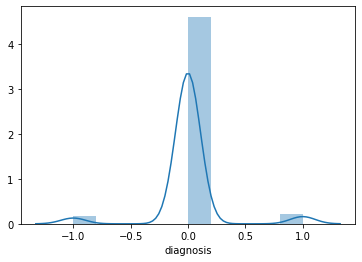

In [58]:
sns.distplot(y_test-y_pred4)

In [8]:
model = pickle.load(open("breastcancer_model.pkl","rb"))


In [30]:
x_test[0]

array([-0.20175604,  0.3290786 , -0.13086754, -0.27145506,  1.02919769])

In [80]:
lst = np.array([[8.670,19.67,50.19,210.0,0.0976]])
lst  = np.reshape(lst,(-1,1))
x = st.fit(lst).transform(lst)
x = np.reshape(x,(1,5))

print(x)

[[-0.62891749 -0.48789172 -0.09660932  1.95223868 -0.73882015]]


In [81]:
pred = model.predict(x_test)

In [82]:
pred[0]

0

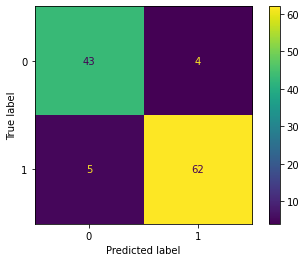

In [87]:
cm = plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [86]:
cm.confusion_matrix

array([[43,  4],
       [ 5, 62]], dtype=int64)